# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import json
from path import Path
import pandas as pd
from pandas.io.json import json_normalize
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from newsapi.newsapi_client import NewsApiClient
import alpaca_trade_api as tradeapi
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from datetime import datetime, timedelta
from nltk.corpus import reuters, stopwords

%matplotlib inline


from pandas.io.json import json_normalize

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fvaladrien/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# news_api = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])
news_api_key = os.getenv("NEWS_API_KEY")
newsapi = NewsApiClient(api_key=news_api_key)

In [3]:
# Create a newsapi client
def get_headlines(keyword):
    all_headlines = []
    all_dates = []    
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1,
        )
        headlines = []
        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_headlines, all_dates


newsapi = NewsApiClient(api_key='96b214f04fc743aba8b5ab51d873ae7f')


In [4]:
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

In [5]:
# Fetch the Bitcoin news articles

# btc_headlines, dates = get_headlines("bitcoin")

btc_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

# Show sample article
btc_headlines["articles"][0]

Total articles about Bitcoin: 6528


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [6]:
# Fetch the Ethereum news articles
# eth_headlines, dates = get_headlines("ethereum")

eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

# Show sample article
eth_headlines["articles"][0]

Total articles about Ethereum: 2966


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Amanda Silberling',
 'title': 'Cent, the platform that Jack Dorsey used to sell his first tweet as an NFT, raises $3M',
 'description': 'Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in late 2020, Cent’s small, San Fransisco-based team created V…',
 'url': 'http://techcrunch.com/2021/08/05/cent-the-platform-that-jack-dorsey-used-to-sell-his-first-tweet-as-an-nft-raises-3m/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/08/Screen-Shot-2021-08-04-at-1.13.16-PM.png?w=764',
 'publishedAt': '2021-08-05T13:22:07Z',
 'content': 'Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]'}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Title Bitcoin": title,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["Date","Text", "Compound", "Positive", "Negative", "Neutral"]
bitcoin_df = bitcoin_df[cols]
# bitcoin_df.sort_values(by='Negative',ascending=False,inplace=True)
bitcoin_df.tail()

# How to wrap text in the text column.

,Date,Text,Compound,Positive,Negative,Neutral
15,2021-08-20,"august\r\n20, 2021\r\n8 min read\r\nthis story...",0.6808,0.157,0.000,0.843
16,2021-08-18,as part of its ongoing data breach investigati...,-0.5859,0.000,0.138,0.862
17,2021-08-13,representations of cryptocurrency bitcoin are ...,0.0000,0.000,0.000,1.000
18,2021-08-23,"london, aug 23 (reuters) - bitcoin's price sur...",0.0000,0.000,0.000,1.000
19,2021-08-24,"august\r\n24, 2021\r\n8 min read\r\nopinions e...",0.7184,0.200,0.000,0.800


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Title Ethereum": title,
        
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Date","Text", "Compound", "Positive", "Negative", "Neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.tail()

,Date,Text,Compound,Positive,Negative,Neutral
15,2021-08-24,More than $144 million worth of ether has been...,0.2263,0.048,0.000,0.952
16,2021-08-24,The ethereum network runs the ether cryptocurr...,0.2263,0.056,0.000,0.944
17,2021-08-24,Miners are the heart of a system known as proo...,-0.4404,0.000,0.079,0.921
18,2021-08-24,Jack Taylor/Getty Images\r\nInvestment firm Va...,0.2960,0.068,0.000,0.932
19,2021-08-24,Its the weirdest cryptocurrency heist so far. ...,-0.8934,0.000,0.312,0.688


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.162885,0.071100,0.033500,0.895400
std,0.447308,0.065972,0.068998,0.071897
min,-0.886000,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.846000
50%,0.138950,0.066500,0.000000,0.904500
75%,0.525925,0.108250,0.043000,0.924750
max,0.718400,0.200000,0.271000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.138720,0.059850,0.026400,0.913700
std,0.394769,0.061361,0.072668,0.078868
min,-0.893400,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.863250
50%,0.226300,0.053000,0.000000,0.922500
75%,0.426225,0.095000,0.000000,0.967750
max,0.695600,0.190000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with a 0.0711 score

Q: Which coin had the highest compound score?

A: Bitcoin with a 0.7184 score

Q. Which coin had the highest positive score?

A: Bitcoin with a 0.2 Score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fvaladrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
## Downloaded the Stopwords from nltk

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text.""" 
    # Remove the punctuation from text
    # Create a tokenized list of the words
    # Lemmatize words into root words
    # Convert the words to lowercase
    # Remove the stop words
    sw= set(stopwords.words('english'))
    sw_addon = {'damn','chars','much','ha'}
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw.union(sw_addon) ]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.Text.apply(tokenizer)
bitcoin_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,tokens
0,2021-08-06,when my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-08-23,paypal will now allow users outside the u.s. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, u, buy, hold, s..."
2,2021-08-10,photo by joe raedle/getty images\r\n\n \n\n tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, image, twitter, squa..."
3,2021-08-19,retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[retailer, increasingly, accepting, cryptocurr..."
4,2021-08-23,"paypal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.Text.apply(tokenizer)
ethereum_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,tokens
0,2021-08-24,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810,"[cent, wa, founded, adfree, creator, network, ..."
1,2021-08-24,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
2,2021-08-24,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."
3,2021-08-24,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861,"[bell, today, coinbase, reported, another, per..."
4,2021-08-24,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.0,1.000,"[representation, ethereum, virtual, currency, ..."


In [16]:
# Not sure if Tokenizing the colum will do the same as tokenizing the dataframe. Might be a duplication. 
btc_token = tokenizer(bitcoin_df.Text.str.cat())
btc_token

['wife',
 'started',
 'little',
 'garden',
 'urban',
 'backyard',
 'could',
 'think',
 'worm',
 'also',
 'bug',
 'dirt',
 'course',
 'filled',
 'worm',
 'bug',
 'composted',
 'corn',
 'cob',
 'charspaypal',
 'allow',
 'user',
 'outside',
 'u',
 'buy',
 'hold',
 'sell',
 'cryptocurrency',
 'first',
 'time',
 'company',
 'announced',
 'today',
 'launch',
 'new',
 'service',
 'allow',
 'customer',
 'uk',
 'charsphoto',
 'joe',
 'raedlegetty',
 'image',
 'twitter',
 'square',
 'ceo',
 'jack',
 'dorsey',
 'noted',
 'superfan',
 'bitcoin',
 'claimed',
 'monday',
 'cryptocurrency',
 'eventually',
 'unite',
 'world',
 'yes',
 'reallyon',
 'mond',
 'charsretailers',
 'increasingly',
 'accepting',
 'cryptocurrency',
 'physical',
 'item',
 'knowyou',
 'spend',
 'crypto',
 'ephemeral',
 'experience',
 'like',
 'travel',
 'cryptocurrency',
 'holder',
 'indicate',
 'willi',
 'charspaypal',
 'bringing',
 'ability',
 'buy',
 'hold',
 'sell',
 'cryptocurrencies',
 'across',
 'side',
 'pond',
 'better',

In [17]:
# Not sure if Tokenizing the colum will do the same as tokenizing the dataframe. Might be a duplication. 
eth_token = tokenizer(ethereum_df.Text.str.cat())
eth_token

['cent',
 'wa',
 'founded',
 'adfree',
 'creator',
 'network',
 'allows',
 'user',
 'offer',
 'crypto',
 'reward',
 'good',
 'post',
 'comment',
 'like',
 'gifting',
 'award',
 'reddit',
 'ethereum',
 'charspaypal',
 'allow',
 'user',
 'outside',
 'us',
 'buy',
 'hold',
 'sell',
 'cryptocurrency',
 'first',
 'time',
 'company',
 'announced',
 'today',
 'launch',
 'new',
 'service',
 'allow',
 'customer',
 'uk',
 'charspaypal',
 'bringing',
 'ability',
 'buy',
 'hold',
 'sell',
 'cryptocurrencies',
 'across',
 'side',
 'pond',
 'better',
 'part',
 'year',
 'launched',
 'us',
 'statement',
 'company',
 'said',
 'tha',
 'charsafter',
 'bell',
 'today',
 'coinbase',
 'reported',
 'another',
 'period',
 'impressive',
 'result',
 'second',
 'quarter',
 'earnings',
 'reportduring',
 'quarter',
 'coinbases',
 'total',
 'revenue',
 'reached',
 'billion',
 'helped',
 'charsrepresentation',
 'ethereum',
 'virtual',
 'currency',
 'standing',
 'pc',
 'motherboard',
 'seen',
 'illustration',
 'pictu

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
N=2
bigram_counts_B = Counter(ngrams(btc_token, N))
print(dict(bigram_counts_B))

{('wife', 'started'): 1, ('started', 'little'): 1, ('little', 'garden'): 1, ('garden', 'urban'): 1, ('urban', 'backyard'): 1, ('backyard', 'could'): 1, ('could', 'think'): 1, ('think', 'worm'): 1, ('worm', 'also'): 1, ('also', 'bug'): 1, ('bug', 'dirt'): 1, ('dirt', 'course'): 1, ('course', 'filled'): 1, ('filled', 'worm'): 1, ('worm', 'bug'): 1, ('bug', 'composted'): 1, ('composted', 'corn'): 1, ('corn', 'cob'): 1, ('cob', 'charspaypal'): 1, ('charspaypal', 'allow'): 2, ('allow', 'user'): 2, ('user', 'outside'): 1, ('outside', 'u'): 1, ('u', 'buy'): 1, ('buy', 'hold'): 3, ('hold', 'sell'): 3, ('sell', 'cryptocurrency'): 1, ('cryptocurrency', 'first'): 1, ('first', 'time'): 2, ('time', 'company'): 1, ('company', 'announced'): 1, ('announced', 'today'): 1, ('today', 'launch'): 1, ('launch', 'new'): 1, ('new', 'service'): 1, ('service', 'allow'): 1, ('allow', 'customer'): 2, ('customer', 'uk'): 1, ('uk', 'charsphoto'): 1, ('charsphoto', 'joe'): 1, ('joe', 'raedlegetty'): 1, ('raedlegetty

In [20]:
# Generate the Ethereum N-grams where N=2
N= 2
bigram_counts_E = Counter(ngrams(eth_token, N))
print(dict(bigram_counts_E))

{('cent', 'wa'): 1, ('wa', 'founded'): 1, ('founded', 'adfree'): 1, ('adfree', 'creator'): 1, ('creator', 'network'): 1, ('network', 'allows'): 1, ('allows', 'user'): 1, ('user', 'offer'): 1, ('offer', 'crypto'): 1, ('crypto', 'reward'): 1, ('reward', 'good'): 1, ('good', 'post'): 1, ('post', 'comment'): 1, ('comment', 'like'): 1, ('like', 'gifting'): 1, ('gifting', 'award'): 1, ('award', 'reddit'): 1, ('reddit', 'ethereum'): 1, ('ethereum', 'charspaypal'): 1, ('charspaypal', 'allow'): 1, ('allow', 'user'): 1, ('user', 'outside'): 1, ('outside', 'us'): 1, ('us', 'buy'): 1, ('buy', 'hold'): 2, ('hold', 'sell'): 2, ('sell', 'cryptocurrency'): 1, ('cryptocurrency', 'first'): 1, ('first', 'time'): 2, ('time', 'company'): 1, ('company', 'announced'): 1, ('announced', 'today'): 1, ('today', 'launch'): 1, ('launch', 'new'): 1, ('new', 'service'): 1, ('service', 'allow'): 1, ('allow', 'customer'): 1, ('customer', 'uk'): 1, ('uk', 'charspaypal'): 1, ('charspaypal', 'bringing'): 1, ('bringing', 

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
btc_common= token_count(btc_token, 10)
btc_common

[('cryptocurrency', 10),
 ('first', 8),
 ('bitcoin', 8),
 ('customer', 5),
 ('reuters', 5),
 ('allow', 4),
 ('data', 4),
 ('charspaypal', 3),
 ('buy', 3),
 ('hold', 3)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
eth_common= token_count(eth_token,10)
eth_common

[('ethereum', 13),
 ('cryptocurrency', 7),
 ('network', 5),
 ('reuters', 5),
 ('ether', 5),
 ('bitcoin', 5),
 ('crypto', 4),
 ('wa', 3),
 ('us', 3),
 ('first', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

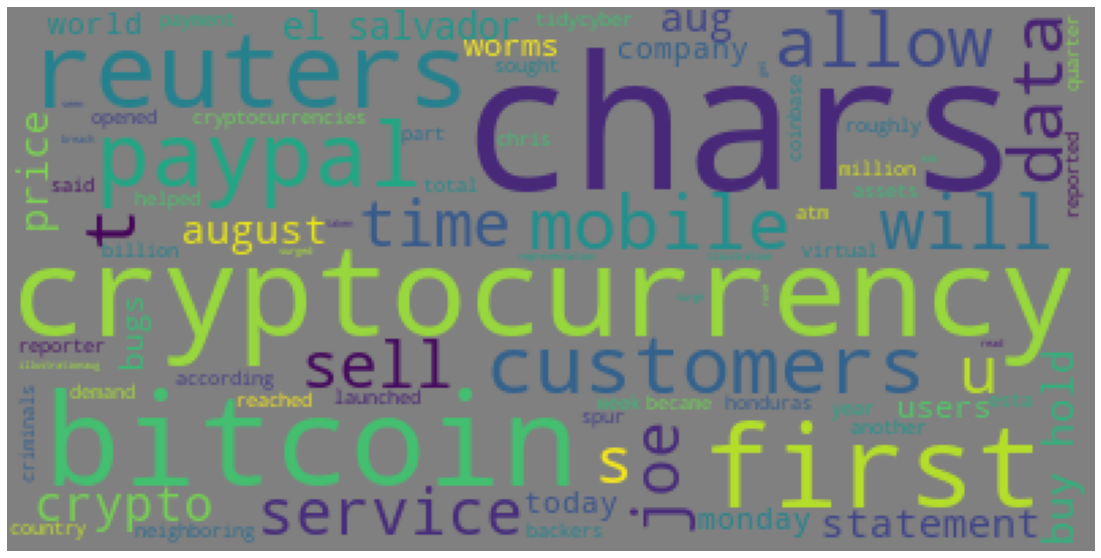

In [25]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud(background_color='grey').generate(bitcoin_df.Text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)

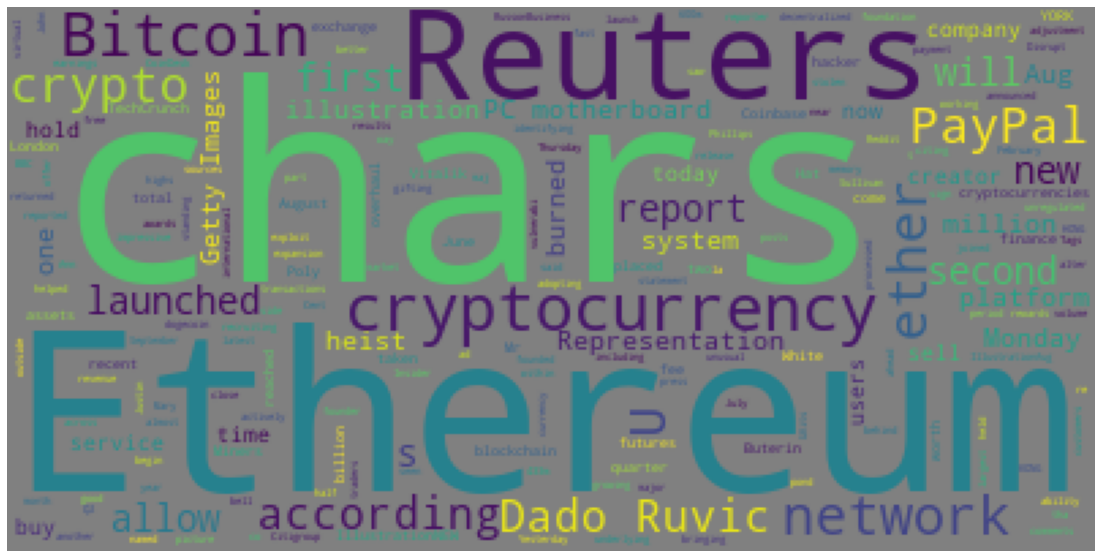

In [27]:
# Generate the Ethereum word cloud
cloud2 = WordCloud(background_color='grey').generate(ethereum_df.Text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
all_concat_bitcoin = bitcoin_df.Text.str.cat()
all_concat_bitcoin

'when my wife started a little garden in our urban backyard, all i could think about were the worms. also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]paypal will now allow users outside the u.s. to buy, hold and sell cryptocurrency for the first time. the company announced today the launch of a new service that will allow customers in the u.k. to … [+4420 chars]photo by joe raedle/getty images\r\n\n \n\n twitter and square ceo jack dorsey, a noted superfan of bitcoin, claimed on monday that the cryptocurrency will eventually unite the world. yes, really.\non mond… [+2119 chars]retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? as more cryptocurrency holders indicate a willi… [+2783 chars]paypal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year 

In [31]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_concat_bitcoin)
bitcoin_doc
# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [33]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

u.s. GPE
first ORDINAL
today DATE
u.k. GPE
joe raedle PERSON
jack dorsey PERSON
monday DATE
a year DATE
chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
chris PERSON
uk GPE
first ORDINAL
four CARDINAL
two years DATE
roughly 49 million CARDINAL
27 CARDINAL
reuters ORG
first ORDINAL
this week DATE
el salvador GPE
first ORDINAL
27 CARDINAL
reuters ORG
first ORDINAL
this week DATE
el salvador GPE
first ORDINAL
today DATE
its second quarter DATE
the quarter DATE
$2.23 billion MONEY
first ORDINAL
$311 billion MONEY
august 6, 2021 DATE
reuters ORG
dado ruvic/illustrationaug ORG
20 CARDINAL
reuters ORG
5.01 % PERCENT
49,106.4 MONEY
22:04 CARDINAL
friday DATE
20, 2021 DATE
roughly 47.8 million CARDINAL
june 7, 2021 DATE
reuters ORG
edgar su PERSON
13 CARDINAL
reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
23 CARDINAL
reuters ORG
50,000 MONEY
monday DATE
first ORDINAL
months-long DATE
50 MONEY
24, 2021 DATE


---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
all_concat_ethereum = ethereum_df.Text.str.cat()
all_concat_ethereum

"Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year after it launched in the US. In a statement, the company said tha… [+850 chars]After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS

In [36]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_concat_ethereum)
ethereum_doc

# Add a title to the document
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [37]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [38]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

2017 DATE
Reddit NORP
Ethereum PERSON
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
a year DATE
US GPE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
Monday DATE
Poly Network ORG
White PERSON
+1513 chars]HONG KONG ORG
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
TechCrunch Disrupt London 2015 ORG
John Phillips PERSON
Vitalik Buterin PERSON
Sullivan/Getty Images
Citigroup ORG
CoinDesk PRODUCT
two CARDINAL
one CARDINAL
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
25 CARDINAL
Reuters ORG
September DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
first ORDINAL
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
above $100 MONEY
first ORDINAL
Mo

---